<a href="https://colab.research.google.com/github/CarolinaAguilaC/Examen/blob/main/Problema25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEMA** **25**

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente. 

|Periódicos|30|40|50|60|70|  
|----------|--|--|--|--|--|
|f(x)|20%|25%|25%|20%|10%|

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.

###**Solución analítica**

Calculamos la probabilidad de que se vendan diferentes cantidades de periódicos:  
- 30 periódicos: $0.2 · 30 = 6$ periódicos vendidos en promedio cada día.  
- 40 periódicos: $0.25 · 40 = 10$ periódicos vendidos en promedio cada día.
- 50 periódicos: $0.25 · 50 = 12.5$ periódicos vendidos en promedio cada día.
- 60 periódicos: $0.2 · 60 = 12$ periódicos vendidos en promedio cada día.
- 70 periódicos: $0.1 · 70 = 7$ periódicos vendidos en promedio cada día.

Ahora,  calculamos el número de periódicos que se desperdician cada día y el costo asociado. Si se piden 50 periódicos cada día, entonces:
- Si se venden 30 periódicos:  $20 · 0.10 = 2\ € $.  
- Si se venden 40 periódicos: $10 · 0.10 = 1\ €$.
- Si se venden 50 periódicos: $0\ €$.
- Si se venden 60 periódicos: $10 · 0.10 = 1\ €$.
- Si se venden 70 periódicos: $20 ⋅ 0.10 = 2\ € $.

El ingreso diario sería la cantidad de periódicos vendidos multiplicada por el precio de venta, es decir, 50  $\cdotp$ 1.10 = 55 €. El costo diario sería la cantidad de periódicos pedidos multiplicada por el costo por periódico, es decir, 50 $·$ 0.90 = 45 €. Entonces, el beneficio diario sería el ingreso diario menos el costo diario menos el costo del desperdicio de periódicos, es decir, 55 - 45 - (2 + 1 + 1 + 2) = 4 €.

Por lo tanto, el beneficio promedio diario del quiosquero sería de 4 € si pide 50 periódicos cada día.

### **1. Identifique las variables**

Ventas de los periódicos

### **2. Determine la distribución de probabilidad**

|Periódicos|30|40|50|60|70|  
|----------|--|--|--|--|--|
|f(x)|20%|25%|25%|20%|10%|

### **3. Determine la distribución de probabilidad acumulada**

|Periódicos|30|40|50|60|70|  
|----------|--|--|--|--|--|
|f(x)|20%|25%|25%|20%|10%|  
|F(x)|0.20|0.45|0.70|0.90|1.00|

### **4. Establezca el intervalo de números aleatorios correspondiente a cada valor**

|Periódicos|30|40|50|60|70|  
|----------|--|--|--|--|--|
|f(x)|20%|25%|25%|20%|10%|  
|F(x)|0.20|0.45|0.70|0.90|1.00|  
|Intervalos|0.00-0.19|0.20-0.44|0.45-0.69|0.70-0.89|0.90-1.00|

### **5. Genere números aleatorios**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def ventas_sim():
    ventas=0
    u = random.random() #Se generan números aleatorios para simularlas ventas
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas #Devolvemos el valor que el número aleatorio obtuvo

In [3]:
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    
    if vs > pedido: #Si las ventas son menores que el pedido se hacen algunas operaciones
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
        
    else: #Si es mayor, se hacen otras
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben

In [4]:
beneficio(50)

10.000000000000007

In [5]:
def simulacion(n):
    L=[]
    benef = 0
    for i in range(n):
        benef += beneficio(50)
        L.append(benef/(i+1))
    return L

In [6]:
X=simulacion(500)

###**6. Graficamos**

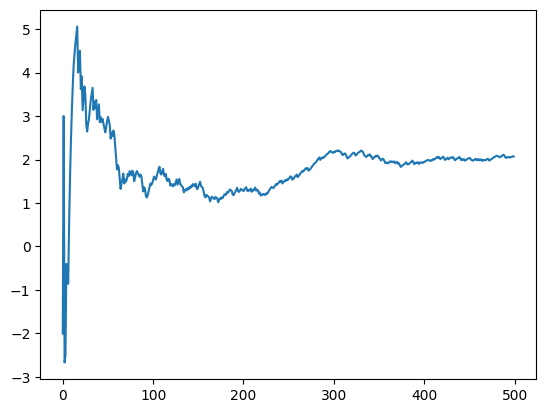

In [7]:
plt.plot(X) #Graficamos

In [8]:
np.mean(X)

1.8428418962782571

###**7. Repetimos el modelo**

In [9]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(500)
        lista.append(np.mean(s))
    return lista

In [10]:
Y=modelo(40) 

In [11]:
print(np.mean(Y), np.std(Y))

1.449129054760688 0.570085272490246


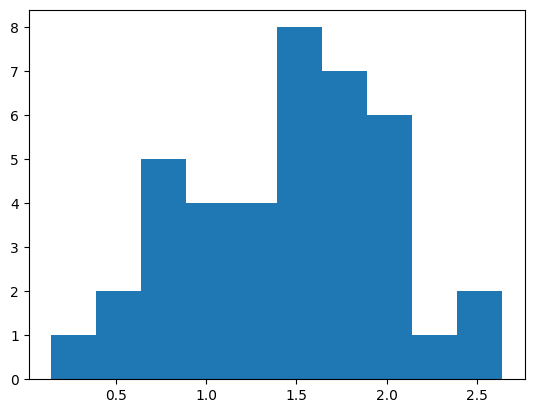

In [12]:
plt.hist(Y) #Graficamos la repeticion del modelo
plt.show()

###**8. Encontrar los intervalos de confianza**

In [13]:
print("El intervalo de confianza es: ",
np.mean(Y)-(1.96)*((np.var(Y))/np.sqrt(40)), "≤ m ≤",
np.mean(Y)+(1.96)*((np.var(Y))/np.sqrt(40)))

El intervalo de confianza es:  1.3484113734628624 ≤ m ≤ 1.5498467360585138


##**Determine, por simulación, el pedido de periódicos que optimiza el beneficio**

In [30]:
def calcular_beneficio(num_pedidos):
    ingresos = num_pedidos * 1.10
    costo_periodicos = num_pedidos * 0.90
    periodicos_no_vendidos = max(0, num_pedidos - 50)
    costo_ventas_perdidas = periodicos_no_vendidos * 0.20
    costo_reciclaje = periodicos_no_vendidos * 0.10
    beneficio = ingresos - costo_periodicos - costo_ventas_perdidas - costo_reciclaje
    return beneficio

mejor_pedido = 0
mejor_beneficio = 0

for num_pedidos in range(30, 71):
    beneficio = calcular_beneficio(num_pedidos)
    if beneficio > mejor_beneficio:
        mejor_beneficio = beneficio
        mejor_pedido = num_pedidos

print("El pedido óptimo de periódicos es:", mejor_pedido)
print("El beneficio máximo obtenido es:", mejor_beneficio)


El pedido óptimo de periódicos es: 50
El beneficio máximo obtenido es: 10.000000000000007
